In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import os
import joblib
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

In [11]:
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == "Darwin":  # macOS
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":  # Windows
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)
elif platform.system() == "Linux":  # Linux (Ubuntu, Docker 등)
    font_path = "fonts/NanumGothic.ttf"
    if not os.path.exists(font_path):
        st.error("NanumGothic.ttf 폰트 파일이 존재하지 않습니다. 'fonts' 폴더 내에 폰트 파일을 확인하세요.")
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)

12:47:24 - cmdstanpy - INFO - Chain [1] start processing


12:47:24 - cmdstanpy - INFO - Chain [1] done processing


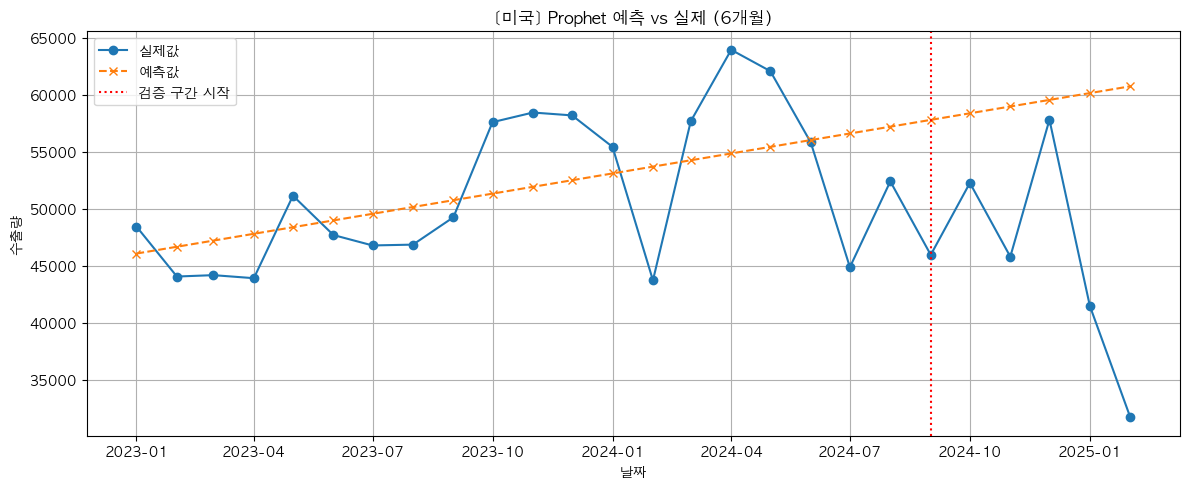

In [26]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score
from datetime import datetime
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv("../../data/processed/현대_지역별수출실적_전처리.csv")  # 파일 경로 확인 필요
month_cols = [col for col in df.columns if col not in ['지역명', '대륙']]
df[month_cols] = df[month_cols].replace("-", 0).apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# 지역 설정
region = "미국"
n_months = 6
sub_df = df[df["지역명"] == region]

# 시계열 변환
monthly_values = sub_df[month_cols].values.flatten()
start_date = datetime.strptime("2023-01", "%Y-%m")
date_range = pd.date_range(start=start_date, periods=len(monthly_values), freq='MS')
df_prophet = pd.DataFrame({"ds": date_range, "y": monthly_values})

# 학습/검증 분리
train_df = df_prophet[:-n_months]
valid_df = df_prophet[-n_months:]

# Prophet 학습 및 예측
model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=n_months, freq='MS')
forecast = model.predict(future)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label="실제값", marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label="예측값", linestyle='--', marker='x')
plt.axvline(df_prophet['ds'].iloc[-n_months], color='red', linestyle=':', label="검증 구간 시작")
plt.title(f"[{region}] Prophet 예측 vs 실제 ({n_months}개월)")
plt.xlabel("날짜")
plt.ylabel("수출량")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
print(df['지역'].unique())

['U.S.A' 'Canada' 'Mexico' 'Europe Subsidiaries' 'Europe Distributors'
 'Turkey' 'Latin America' 'Russia/CIS' 'Middle East/Africa' 'Asia/Pacific'
 'U.S.A.' 'GME']
